#Importing Libraries



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pickle import dump,load
 

#Importing stock data from yahoo finance

In [ ]:
dataset=pd.read_csv('AAPL.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-21,43.542500,44.005001,43.525002,43.752499,41.604237,83799600
1,2017-12-22,43.669998,43.855000,43.625000,43.752499,41.604237,65397600
2,2017-12-26,42.700001,42.867500,42.419998,42.642502,40.548740,132742000
3,2017-12-27,42.525002,42.695000,42.427502,42.650002,40.555878,85992800
4,2017-12-28,42.750000,42.962502,42.619999,42.770000,40.669987,65920800


#Splitting training and test data

In [ ]:
df1=np.array(dataset['High'])
df1=df1.reshape(-1,1)
print(type(df1))
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]
print(len(test_data))
print(train_data)

<class 'numpy.ndarray'>
378
[[ 44.005001]
 [ 43.855   ]
 [ 42.8675  ]
 [ 42.695   ]
 [ 42.962502]
 [ 42.647499]
 [ 43.075001]
 [ 43.637501]
 [ 43.3675  ]
 [ 43.842499]
 [ 43.9025  ]
 [ 43.764999]
 [ 43.575001]
 [ 43.872501]
 [ 44.34    ]
 [ 44.8475  ]
 [ 44.8125  ]
 [ 45.025002]
 [ 44.895   ]
 [ 44.445   ]
 [ 44.860001]
 [ 44.325001]
 [ 43.737499]
 [ 43.      ]
 [ 42.540001]
 [ 41.842499]
 [ 42.110001]
 [ 42.154999]
 [ 41.700001]
 [ 40.970001]
 [ 40.93    ]
 [ 40.849998]
 [ 40.25    ]
 [ 39.4725  ]
 [ 40.9725  ]
 [ 41.1875  ]
 [ 41.884998]
 [ 43.272499]
 [ 43.705002]
 [ 43.564999]
 [ 43.529999]
 [ 43.487499]
 [ 43.912498]
 [ 44.8475  ]
 [ 45.119999]
 [ 45.154999]
 [ 44.945   ]
 [ 44.075001]
 [ 44.435001]
 [ 44.5625  ]
 [ 43.962502]
 [ 44.279999]
 [ 45.      ]
 [ 45.5975  ]
 [ 45.875   ]
 [ 45.130001]
 [ 45.060001]
 [ 44.779999]
 [ 44.3675  ]
 [ 44.200001]
 [ 43.772499]
 [ 43.169998]
 [ 42.48    ]
 [ 43.275002]
 [ 43.787498]
 [ 42.505001]
 [ 42.9375  ]
 [ 42.235001]
 [ 42.1875  ]
 [ 43.

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data=sc.fit_transform(train_data)
test_data=sc.transform(test_data)
print(train_data)

[[-0.91878499]
 [-0.92335378]
 [-0.95343143]
 [-0.9586855 ]
 [-0.95053782]
 [-0.96013231]
 [-0.94711129]
 [-0.92997844]
 [-0.93820224]
 [-0.92373454]
 [-0.921907  ]
 [-0.92609506]
 [-0.93188209]
 [-0.92282072]
 [-0.90858146]
 [-0.89312383]
 [-0.89418987]
 [-0.88771741]
 [-0.89167706]
 [-0.90538333]
 [-0.89274307]
 [-0.90903831]
 [-0.92693267]
 [-0.94939569]
 [-0.96340652]
 [-0.9846513 ]
 [-0.97650363]
 [-0.97513306]
 [-0.98899156]
 [-1.01122618]
 [-1.01244455]
 [-1.01488128]
 [-1.03315625]
 [-1.05683764]
 [-1.01115007]
 [-1.00460151]
 [-0.98335685]
 [-0.94109582]
 [-0.92792247]
 [-0.93218674]
 [-0.93325278]
 [-0.93454726]
 [-0.92160248]
 [-0.89312383]
 [-0.88482395]
 [-0.88375791]
 [-0.89015414]
 [-0.9166529 ]
 [-0.90568788]
 [-0.90180447]
 [-0.92007944]
 [-0.91040899]
 [-0.88847893]
 [-0.87028004]
 [-0.86182784]
 [-0.88451931]
 [-0.88665139]
 [-0.8951798 ]
 [-0.90774386]
 [-0.9128456 ]
 [-0.92586662]
 [-0.94421783]
 [-0.96523405]
 [-0.94101958]
 [-0.92540978]
 [-0.96447256]
 [-0.95129

##Making Time Steps Data

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 60
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape) 

(820, 60)
(820,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(318, 60)
(318,)


(None, None)

#Making LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
# model.add(Dropout(0.2))
model.add(LSTM(60,return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(70))
# model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 60, 60)            26640     
                                                                 
 lstm_8 (LSTM)               (None, 70)                36680     
                                                                 
 dense_2 (Dense)             (None, 1)                 71        
                                                                 
Total params: 73,791
Trainable params: 73,791
Non-trainable params: 0
_________________________________________________________________


#Training the model

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=50,verbose=1)

Epoch 1/100
17/17 [==============================] - 11s 294ms/step - loss: 0.2357 - val_loss: 1.3765
Epoch 2/100
17/17 [==============================] - 2s 133ms/step - loss: 0.0362 - val_loss: 0.6875
Epoch 3/100
17/17 [==============================] - 4s 229ms/step - loss: 0.0213 - val_loss: 0.4902
Epoch 4/100
17/17 [==============================] - 2s 122ms/step - loss: 0.0198 - val_loss: 0.5662
Epoch 5/100
17/17 [==============================] - 2s 121ms/step - loss: 0.0181 - val_loss: 0.5489
Epoch 6/100
17/17 [==============================] - 2s 123ms/step - loss: 0.0170 - val_loss: 0.3994
Epoch 7/100
17/17 [==============================] - 2s 124ms/step - loss: 0.0163 - val_loss: 0.3536
Epoch 8/100
17/17 [==============================] - 2s 124ms/step - loss: 0.0156 - val_loss: 0.3843
Epoch 9/100
17/17 [==============================] - 2s 122ms/step - loss: 0.0147 - val_loss: 0.3143
Epoch 10/100
17/17 [==============================] - 2s 123ms/step - loss: 0.0135 - val_l

#Predicting values for test data

In [ ]:
y_pred=model.predict(x_test)
y_pred=sc.inverse_transform(y_pred)
y_test=y_test.reshape(-1,1)
y_test=sc.inverse_transform(y_test)
print(y_test)

10/10 [==============================] - 1s 29ms/step
[[148.820007]
 [144.839996]
 [144.600006]
 [146.429993]
 [147.080002]
 [147.470001]
 [145.960007]
 [144.75    ]
 [144.449997]
 [144.380005]
 [142.919998]
 [142.210007]
 [142.240005]
 [142.149994]
 [144.220001]
 [144.179993]
 [144.809998]
 [143.25    ]
 [141.399994]
 [143.880005]
 [144.899994]
 [146.839996]
 [149.169998]
 [149.75    ]
 [149.639999]
 [150.179993]
 [149.369995]
 [150.839996]
 [149.729996]
 [153.169998]
 [149.940002]
 [149.699997]
 [151.570007]
 [151.970001]
 [152.429993]
 [152.199997]
 [151.570007]
 [151.429993]
 [150.130005]
 [149.429993]
 [150.399994]
 [151.880005]
 [151.490005]
 [155.      ]
 [158.669998]
 [161.020004]
 [165.699997]
 [161.800003]
 [162.139999]
 [160.449997]
 [161.190002]
 [165.520004]
 [170.300003]
 [164.199997]
 [164.960007]
 [167.880005]
 [171.580002]
 [175.960007]
 [176.75    ]
 [179.630005]
 [182.130005]
 [177.740005]
 [179.5     ]
 [181.139999]
 [173.470001]
 [170.580002]
 [173.199997]
 [175.86

#Checking mean square error between y_test and y_pred

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,y_pred))

7.077948139033019

#Plotting real and predicted prices

Text(0, 0.5, 'Price')

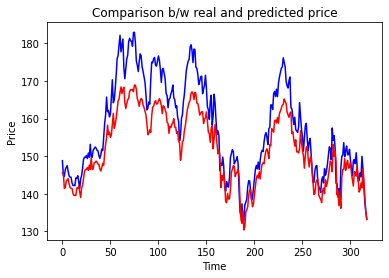

In [ ]:
plt.plot(y_test,color='blue', label='Real Prices')
plt.plot(y_pred,color='red', label='Predicted Prices')
plt.title('Comparison b/w real and predicted price')
plt.xlabel('Time')
plt.ylabel('Price')

#Prediction for next 30 days

In [ ]:
x_input=test_data[318:].reshape(1,-1)
print(x_input.shape)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

(1, 60)


In [ ]:
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<30):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.7418581]
61
1 day input [2.32914469 2.20974788 2.09948869 2.09857497 2.19451869 2.22985054
 2.23472351 2.09948869 2.06263383 2.04618652 2.01603256 2.11441299
 2.14273953 2.09339665 2.20913859 2.15583642 2.18446736 2.24416601
 2.31665666 2.38549288 2.37026369 2.28071598 2.53808923 2.43879505
 2.47564945 2.37574598 2.09035108 2.08639134 1.97917771 2.04862279
 1.96090295 2.21431646 2.30995578 2.31817967 2.41899683 2.30569161
 2.35472964 2.3918889  2.3209208  2.32244381 2.36539025 2.27553811
 2.20731115 2.15157228 2.27066465 2.28315271 2.24873458 2.337673
 2.22741381 2.10771212 2.11228115 2.17472093 2.14213024 2.30873763
 2.20792047 2.0598927  1.93349013 1.85886718 1.79947343 1.74185812]
1 day output [[1.6872796]]
2 day input [2.20974788 2.09948869 2.09857497 2.19451869 2.22985054 2.23472351
 2.09948869 2.06263383 2.04618652 2.01603256 2.11441299 2.14273953
 2.09339665 2.20913859 2.15583642 2.18446736 2.24416601 2.31665666
 2.38549288 2.37026369 2.28071598 2.53808923 2.43879505 2.475649

In [ ]:
sc.inverse_transform(lst_output)

array([[131.35839267],
       [129.56648725],
       [127.88281129],
       [126.30763877],
       [124.84410074],
       [123.49872551],
       [122.27891806],
       [121.19182507],
       [120.24294939],
       [119.43594265],
       [118.7714467 ],
       [118.24768468],
       [117.86097755],
       [117.60546632],
       [117.47450918],
       [117.4606894 ],
       [117.55513431],
       [117.74922563],
       [118.03335879],
       [118.39748696],
       [118.83114844],
       [119.32362713],
       [119.86428522],
       [120.44261402],
       [121.04640629],
       [121.66549775],
       [122.28900012],
       [122.90729708],
       [123.51214216],
       [124.0943261 ]])

In [ ]:
# dump(model, open('model.pkl', 'wb'))
# dump(sc, open('scalar.pkl', 'wb'))

In [ ]:
#import keras
!pip install pysurvival

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 26.3 MB/s 
  Created wheel for pysurvival: filename=pysurvival-0.1.2-cp38-cp38-linux_x86_64.whl size=3914687 sha256=bc6c21025b3b0d35fa16f940fab4124e023bcaec960d0a07de114876155503e7
  Stored in directory: /root/.cache/pip/wheels/7d/91/3f/2f7fbe287fc5aad2034935fe8e6c8bb3c56bf28c207fe9d700
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12081 sha256=2441ff9690bd914e96b0921e2d8b40dd4c7591667eebf3767007b6607c3e108f
  Stored in directory: /root/.cache/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=79ccc83e615e01f3fb1f509cad9e2e495978c46fae7af64324a259c55670fff4
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pysurvival progressb

In [ ]:
# from pysurvival.utils import save_model
# save_model(model, 'new_model.zip')

In [ ]:
# from pysurvival.utils import save_model
# save_model(sc, 'new_scalar.zip')

In [ ]:
model.save("again_model.h5")